<a href="https://colab.research.google.com/github/tabaahi07/Machine-Learning/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas  as  pd

Do ensure that you have the file in the path `/Datasets/data.csv`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/data.csv")


# Data Processing

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [ ]:
df["diagnosis"] = df["diagnosis"].replace({"M": 1, "B": 0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

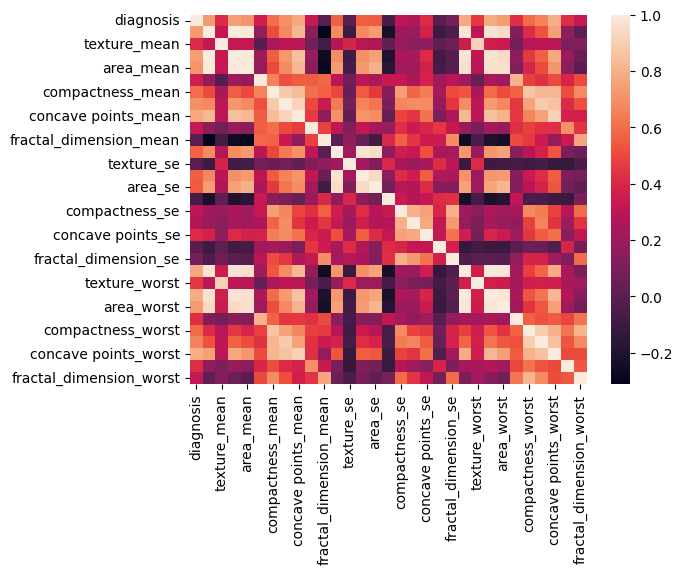

In [ ]:
import seaborn as sb
sb.heatmap(df.corr())

In [ ]:
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
X = scaler.fit_transform(X, Y)

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
inp = X.shape[1]
X.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
perf = {}
model = {}

# Neural Network
Hidden layers : 64 -> 32

epoch : 500

Accuracy Score : 0.986

In [ ]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
def NeuralNet():
  model = keras.Sequential([
      keras.layers.Dense(64, input_shape=(inp,), activation='relu'),
      keras.layers.Dense(32, activation = 'relu'),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.fit(xtrain, ytrain, batch_size = 32, epochs = 100, verbose=2)
  y_pred = model.predict(xtest)
  y_pred = (y_pred > 0.5)
  print(confusion_matrix(ytest, y_pred))
  acc = accuracy_score(ytest, y_pred)
  print(acc)
  return acc, model

In [ ]:
perf["NeuralNetwork"], model["NeuralNetwork"] = NeuralNet()

Epoch 1/100
13/13 - 1s - loss: 0.5150 - accuracy: 0.7990 - 1s/epoch - 108ms/step
Epoch 2/100
13/13 - 0s - loss: 0.2881 - accuracy: 0.9397 - 77ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 0.1938 - accuracy: 0.9523 - 72ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 0.1445 - accuracy: 0.9623 - 80ms/epoch - 6ms/step
Epoch 5/100
13/13 - 0s - loss: 0.1176 - accuracy: 0.9698 - 68ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.1007 - accuracy: 0.9749 - 71ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0906 - accuracy: 0.9774 - 82ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0817 - accuracy: 0.9824 - 73ms/epoch - 6ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0767 - accuracy: 0.9824 - 89ms/epoch - 7ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0713 - accuracy: 0.9824 - 48ms/epoch - 4ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0678 - accuracy: 0.9824 - 40ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0630 - accuracy: 0.9799 - 74ms/epoch - 6ms/step
Epoch 13/100
13/13 - 0s -

# Logistic Regression

accuracy score : 0.965

In [ ]:
from sklearn.linear_model import LogisticRegression
def LogReg():
  logResModel = LogisticRegression()
  logResModel.fit(xtrain, ytrain)
  y_pred = logResModel.predict(xtest)
  print(confusion_matrix(ytest, y_pred))
  acc = accuracy_score(ytest, y_pred)
  print(acc)
  return acc, logResModel

In [ ]:
perf["Logistic"], model["Logistic"] = LogReg()

[[103   1]
 [  3  64]]
0.9766081871345029


# Decision Tree Classifier
accuracy score : 0.944

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def DT():
  DTmodel = DecisionTreeClassifier()
  DTmodel.fit(xtrain, ytrain)
  y_pred = DTmodel.predict(xtest)
  print(confusion_matrix(ytest, y_pred))
  acc = accuracy_score(ytest, y_pred)
  print(acc)
  return acc, DTmodel

In [ ]:
perf["DecisionTree"] = DT()[0]

[[99  5]
 [ 3 64]]
0.9532163742690059


# KNN

accuracy score : 0.986

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
res = []
def performKNN(k):
  KNNmodel = KNeighborsClassifier(n_neighbors = k)
  KNNmodel.fit(xtrain, ytrain)
  y_pred = KNNmodel.predict(xtest)
  return ((accuracy_score(ytest, y_pred))), KNNmodel


<Axes: >

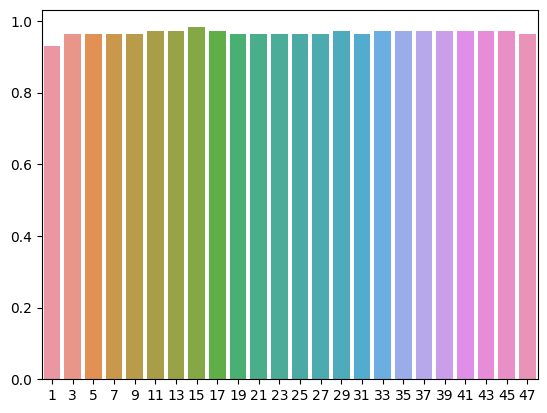

In [ ]:
res = [performKNN(i)[0] for i in range(1, 49, 2)]
sb.barplot(x=[i for i in range(1, 49, 2)], y=res)

In [ ]:

perf["KNN"], model["KNN"] = performKNN(5)

# Support Vector Machine

accuracy score : 0.979

In [ ]:
from sklearn.svm import SVC

def SupVec():
  SVCmodel = SVC()
  SVCmodel.fit(xtrain, ytrain)
  y_pred = SVCmodel.predict(xtest)
  print(confusion_matrix(ytest, y_pred))
  acc = accuracy_score(ytest, y_pred)
  print(acc)
  return acc, SVCmodel

In [ ]:
perf["SVM"], model["SVM"] = SupVec()

[[104   0]
 [  1  66]]
0.9941520467836257


# Naive Bayes Classifier

accuracy score = 0.916

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
def NB():
  NBmodel = GaussianNB()
  NBmodel.fit(xtrain, ytrain)
  y_pred = NBmodel.predict(xtest)
  acc = accuracy_score(ytest, y_pred)
  print(acc)
  return acc, NBmodel

In [ ]:
perf["NaiveBayes"], model["NaiveBayes"] = NB()

0.9590643274853801


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def RF():
  rfc = RandomForestClassifier(n_estimators=10)
  rfc.fit(xtrain, ytrain)
  y_pred = rfc.predict(xtest)
  acc = accuracy_score(ytest, y_pred)
  print(acc)
  return acc, rfc

In [ ]:
perf["RF"], model["RF"] = RF()

0.9415204678362573


# Comparison of all the techniques

<Axes: >

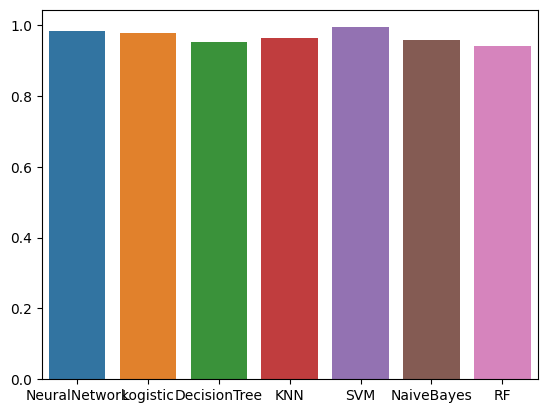

In [ ]:
sb.barplot(x=list(perf.keys()), y=list(perf.values()))